In [30]:
import pandas as pd
import numpy as np

In [31]:
train_org = pd.read_csv('../../Datas/KaggleHouse/train.csv',engine='python')
test_org = pd.read_csv('../../Datas/KaggleHouse/test.csv')
test_org['Id'].to_csv(r'../../Datas/KaggleHouse/Id.csv',index = False, header = False)
test_org.shape

(1459, 80)

In [32]:
train = train_org.copy()
test = test_org.copy()

train.shape,test.shape

((1460, 81), (1459, 80))

## Data Processing for Train
    - Drop ID
    - Normoralized data
    - Remove out lier
    - Remove strong corleation features

In [33]:
train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

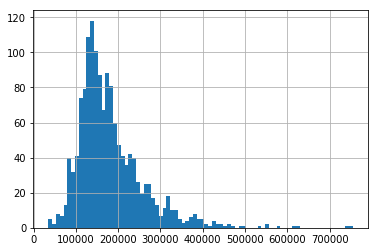

In [34]:
plt = train['SalePrice'].hist(bins = 80)

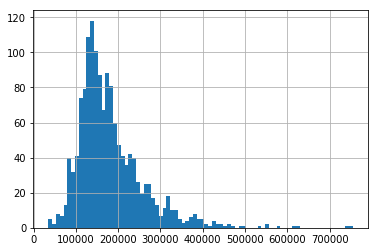

In [35]:
# train['LogSalePrice'] = np.log(train['SalePrice'])
train['LogSalePrice']=train['SalePrice']
plt = train['LogSalePrice'].hist(bins = 80)
train = train.drop(['SalePrice'],axis=1)

In [36]:
train_num = train._get_numeric_data()
test_num = test._get_numeric_data()

## Check Disturbation of Each Numerical Colum
    - Find Category Data
    - Find Outliers

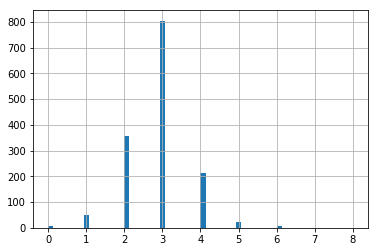

In [37]:
plt = train['BedroomAbvGr'].hist(bins = 60)

Categorgical Data: 

['MSSubClass','MSZoning','Street','Alley','LotShape',
'LandContour','Utilities','LotConfig','LandSlope',
'Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','OverallQual','OverallCond','YearBuilt',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
'MasVnrType','ExterQual','ExterCond','Foundation',
'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Heating','HeatingQC','CentralAir',
'Electrical','KitchenQual','Functional','FireplaceQu',
'GarageType','GarageYrBlt','GarageFinish','GarageQual',
'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
'MoSold','YrSold','SaleType','SaleCondition']


In [10]:
train_dummy = train[['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']]
test_dummy = test[['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']]

In [11]:
train_num = train.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'],axis=1)
test_num = test.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'],axis=1)

In [12]:
print("train_dummy shape = {}".format(train_dummy.shape))
print("train_num shape = {}".format(train_num.shape))
print("test_dummy shape = {}".format(test_dummy.shape))
print("test_num shape = {}".format(test_num.shape))

train_dummy shape = (1460, 50)
train_num shape = (1460, 31)
test_dummy shape = (1459, 50)
test_num shape = (1459, 30)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

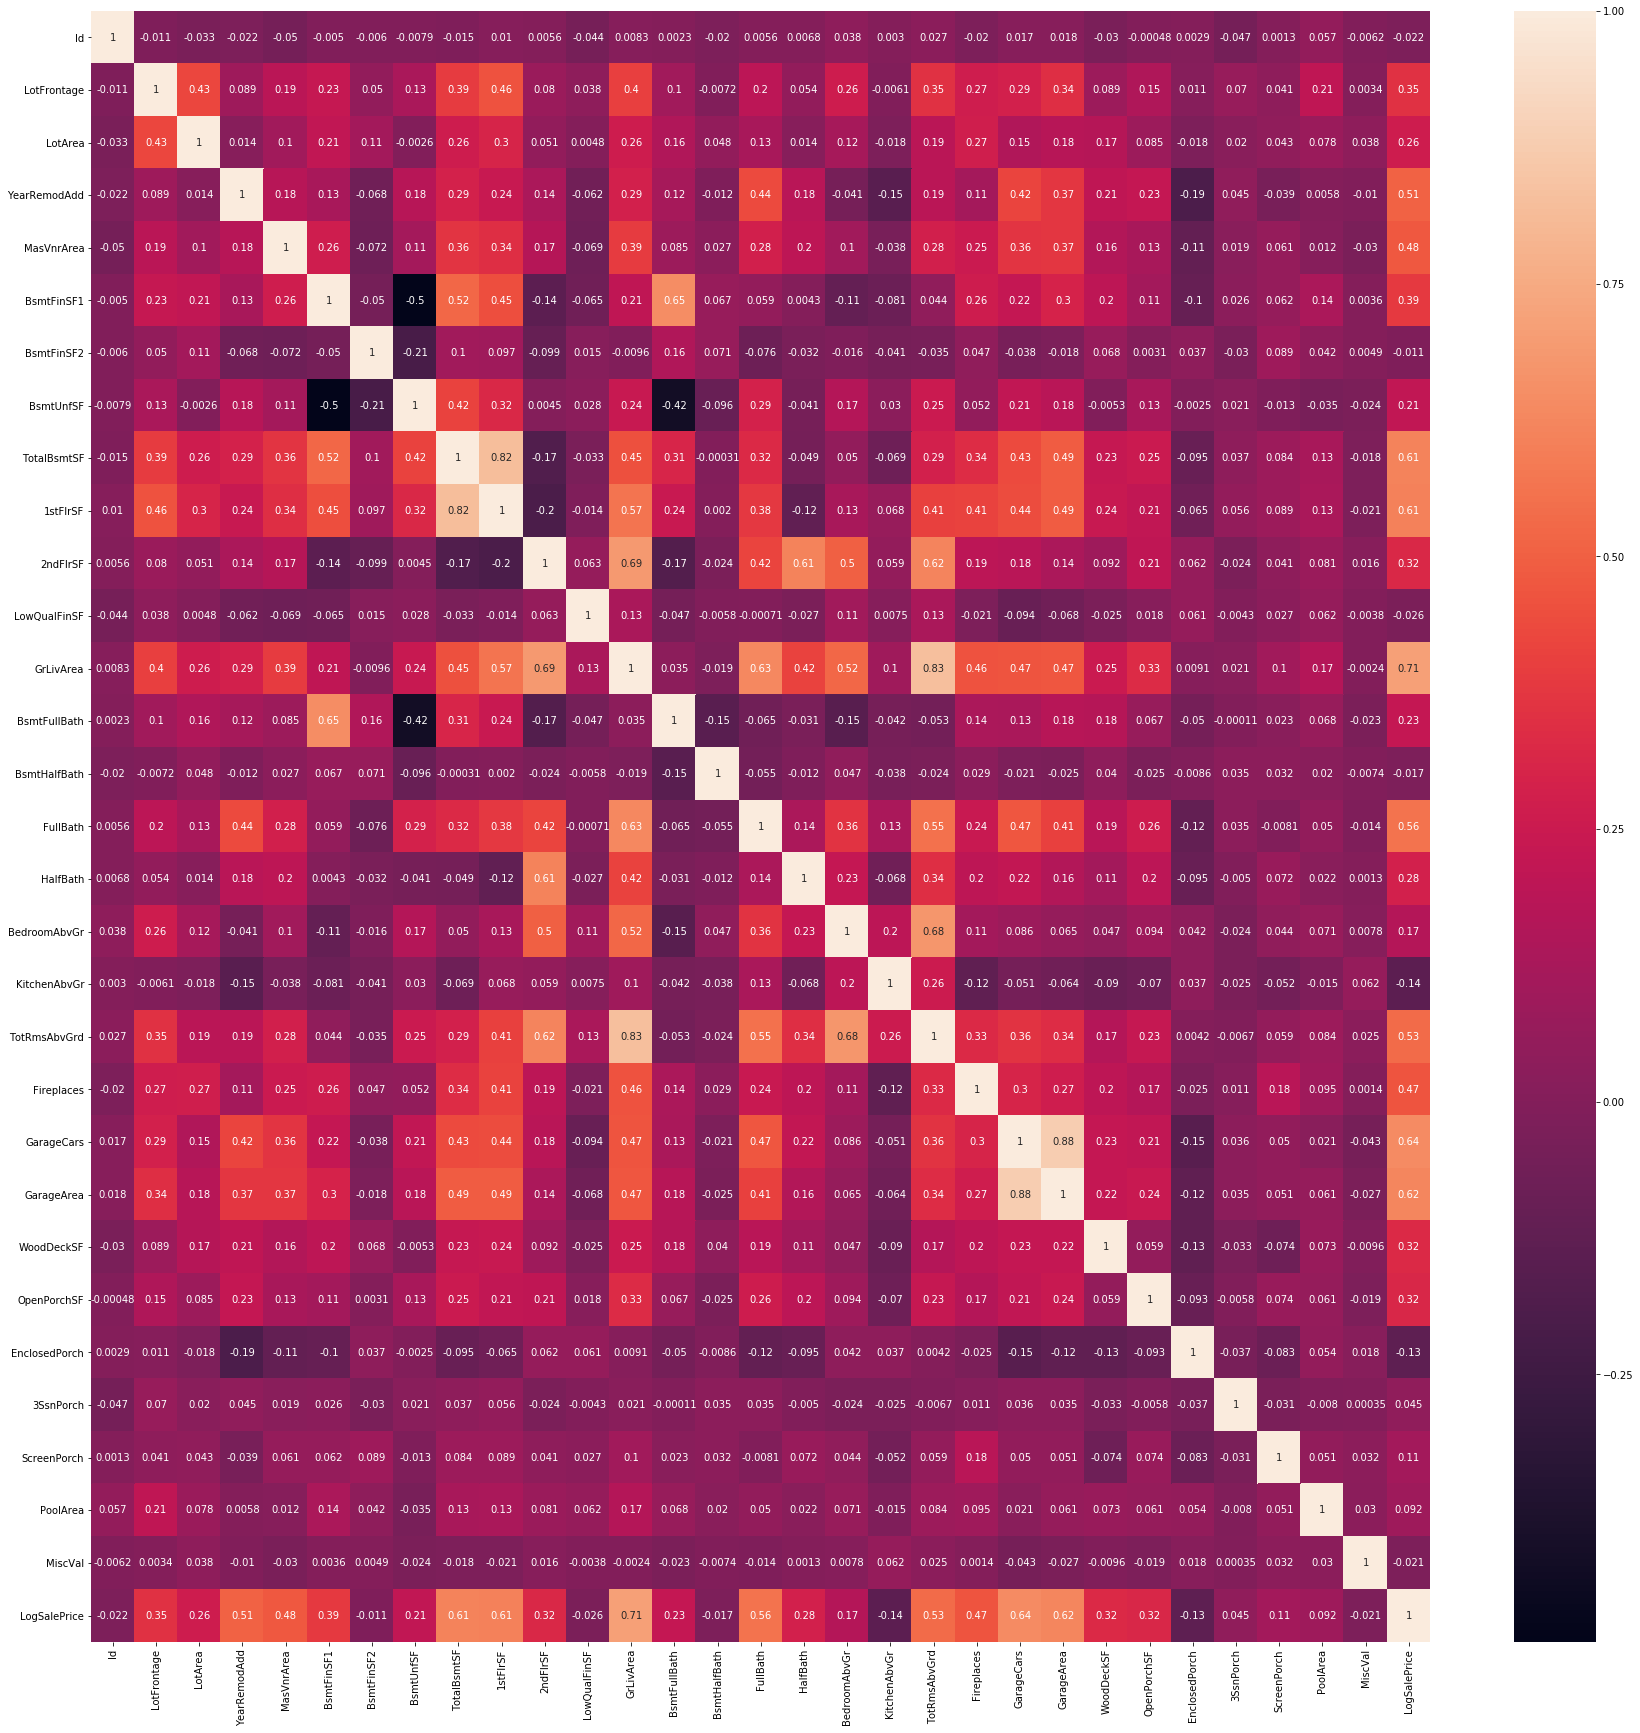

In [14]:
plt.figure(figsize=[30,30])
sns.heatmap(train_num.corr(), annot=True)

## Drop One of Two Highly Correlated Attrubites
Thresh hold for correlation is < or = 0.8
Drop the feature that is less correlated with SalePrice
    - GrLivArea 0.7  > TotRmsAbvGrd 0.53
    - GarageCars 0.68 > GarageArea 0.65
    - 1stFlrSF 0.6 < TotalBsmtSF 0.61

In [15]:
train_num = train_num.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF'],axis=1)
test_num = test_num.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF'],axis=1)

In [16]:
#removing outliers recomended by author
train_num = train_num[train_num['GrLivArea']<4000]

In [17]:
# y = train_org['SalePrice']
y = train_num['LogSalePrice']

In [18]:
X_all_num = pd.concat([train_num.drop(['LogSalePrice'],axis=1),test_num],ignore_index=True,axis=0)
X_all_dummy = pd.concat([train_dummy,test_dummy],ignore_index=True,axis=0)

In [19]:
X_all_num.shape,X_all_dummy.shape,y.shape

((2915, 27), (2919, 50), (1456,))

In [20]:
X_all_num = X_all_num.drop(['Id'],axis=1)

In [21]:
X_all_dummyed = pd.get_dummies(X_all_dummy.fillna('no'),dtype=np.uint8)

In [22]:
X_all_dummyed = X_all_dummyed.select_dtypes(include=['uint8'])

In [23]:
X_all_dummyed.isnull().sum().sum()

0

In [24]:
X_all_num = X_all_num.fillna(0)
X_all_num.shape

(2915, 26)

In [25]:
X_train = X_all_num[:1456].join(X_all_dummyed[:1456])
X_all_num.shape

(2915, 26)

In [26]:
X_test = X_all_num[1456:].join(X_all_dummyed[1456:])
X_test.shape

(1459, 405)

In [29]:
X_train.to_csv('../../Datas/KaggleHouse/X_train_V2.csv',index = False, header = False)
y.to_csv('../../Datas/KaggleHouse/Y_train_V2_log.csv',index = False, header = False)
X_test.to_csv('../../Datas/KaggleHouse/X_test_V2.csv',index = False, header = False)

In [28]:
X_test.shape

(1459, 405)